In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
tweets_df = pd.read_csv('/Users/nitanshjain/Documents/Projects/Twitter_Data_Analysis/v2/data/tweets_cleaned_v2.csv')
print(tweets_df.shape)
tweets_df.head()

(18146, 4)


,tweet_id,tweet,city,year
0,0,it is very bad thing to say that government di...,Mumbai,2022
1,1,all netas and their family should be admitted ...,Mumbai,2022
2,2,govandi is one of the hotspot of a well other ...,Mumbai,2022
3,3,till when medical negligence will exist in gov...,Mumbai,2022
4,4,me being a doctor reading this also government...,Mumbai,2022


In [4]:
print('Tweets by City\n')
print(tweets_df['city'].value_counts())

print('Tweets by Year\n')
print(tweets_df['year'].value_counts())

Tweets by City

city
Delhi        6889
Mumbai       4633
Hyderabad    2420
Bangalore    2349
Kolkata      1036
Chennai       819
Name: count, dtype: int64
Tweets by Year

year
2020    6067
2021    5070
2019    2631
2022    2368
2018    2010
Name: count, dtype: int64


# Pre Sentiment Analysis

In [5]:
wc = WordCloud(stopwords=['acronym', 'hospital', 'terminal', 'rich', 'environment', 'government', 'doctor', 'understand', 'mean', 'patient'], min_word_length=5, background_color='white', colormap="Dark2", max_words=1000, width=800, height=400, random_state=42)

Bangalore
Chennai
Delhi
Hyderabad
Kolkata
Mumbai


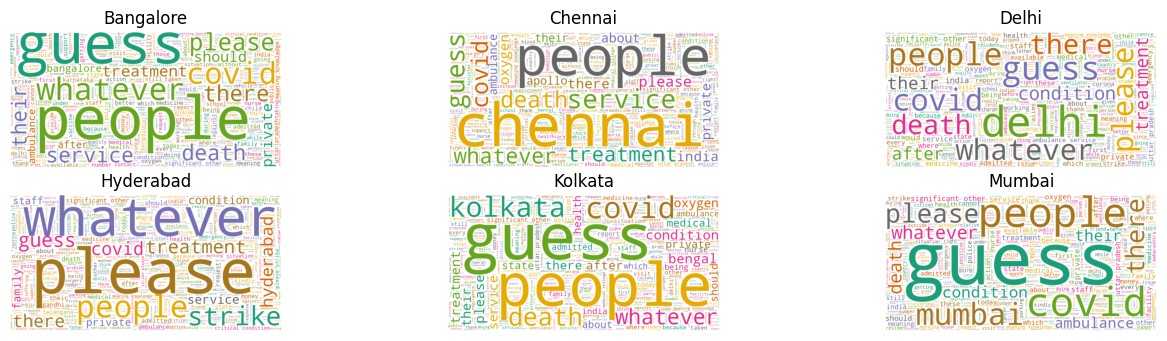

In [6]:
text = tweets_df.groupby('city')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# cities = ['Mumbai', 'Delhi', 'Kolkata',  'Chennai', 'Bangalore', 'Hyderabad']
cities = ['Bangalore', 'Chennai', 'Delhi',  'Hyderabad', 'Kolkata', 'Mumbai']


text = text.to_frame()
text.index = cities

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 6]


for index, city in enumerate(text.index):
    print(city)
    wc.generate(text.tweet[city])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(cities[index])
    
plt.show()                                     

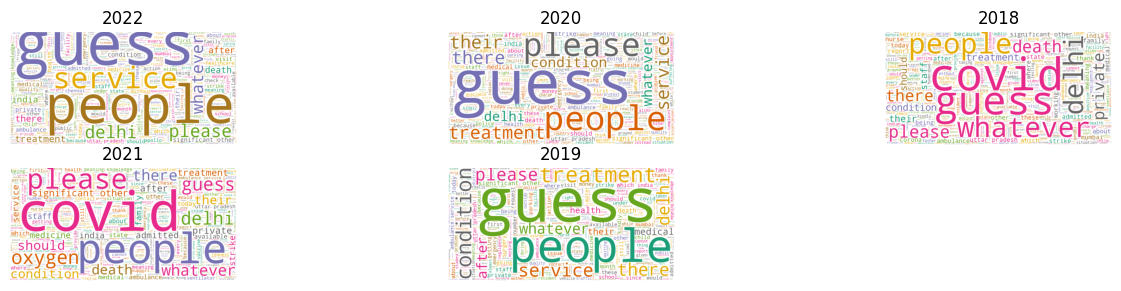

In [7]:
text = tweets_df.groupby('year')['tweet'].apply(lambda x:x.str.cat(sep=" "))
# years = ['2018', '2019', '2020', '2021', '2022']
years = ['2022', '2020', '2018', '2021', '2019']

text = text.to_frame()
text.index = years

# creating a word cloud for all the tweets city wise
plt.rcParams['figure.figsize'] = [16, 5]

for index, year in enumerate(text.index):
    wc.generate(text.tweet[year])
    
    plt.subplot(3, 3, index+1)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(years[index])
    
plt.show()                                     

# Post Sentiment Analysis